<a href="https://colab.research.google.com/github/jadeyu625/Mr.-Ranedeer-AI-Tutor/blob/main/FE_Group_Work_Project_1_M3_Group_7004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This handbook provides a systematic approach to address challenges affecting time series modeling


It is structured to guide you through understanding, diagnosing, and addressing this problem using best software and financial engineering practices. It also provide guidelines for addressing the challenges that affect the modeling of time series.

# 1. Skewness

● Definition:

Skewness measures the asymmetry of a probability distribution.A distribution is asymmetrical when its left and right side are not mirror images.

Skewness = 3 * (Mean – Median) / Standard Deviation. This is known as an alternative Pearson Mode Skewness


● Description:



Skewness indicates whether the distribution of data points is skewed to the left (negative skewness) or to the right (positive skewness). A skewness value of zero indicates a symmetric distribution.

● Demonstration:
Using Nvidia 1 month data to demonstrate

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from datetime import datetime, timedelta

end_date = datetime.now()
start_date = end_date - timedelta(days=30)

# Fetch NVIDIA stock data
nvda = yf.Ticker("NVDA")
data = nvda.history(start=start_date, end=end_date)

# Calculate daily returns
returns = data['Close'].pct_change().dropna()

skewness = skew(returns)

print(f"Skewness of NVIDIA stock returns: {skewness:.4f}")

Skewness of NVIDIA stock returns: 0.3272


A skewness value of 0.3272 for NVIDIA stock returns indicates that the distribution of returns is slightly skewed to the right.

● Diagram:

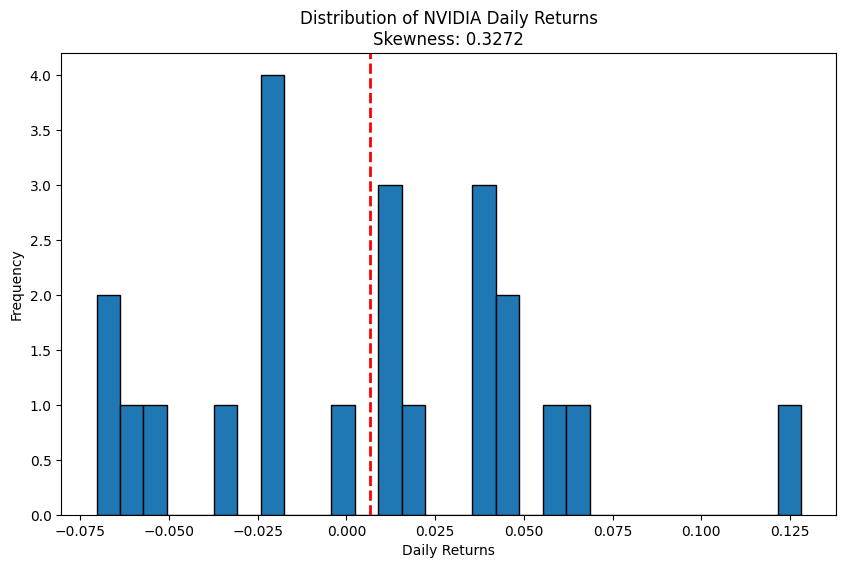

In [ ]:
# Plot histogram of returns
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=30, edgecolor='black')
plt.title(f'Distribution of NVIDIA Daily Returns\nSkewness: {skewness:.4f}')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')

# Add a vertical line at the mean
plt.axvline(returns.mean(), color='r', linestyle='dashed', linewidth=2)

plt.show()



● Diagnosis:

To identify skewness:

a. Visually inspect histograms or Q-Q plots.

For a normal distribution i.e a distribution with no skewness, both the ends (tail regions) taper equally with a peek at the centre of the distribution like a “Bell-Curve”. For data with no skewness the Mean = Median = Mode.

For distribution with left-skewness or negative skewness, the histogram should look like only the left part of the distribution tapers with the peak shifted towards the right-hand side. For Left-Skewed data the Mode > Median > Mean.

For distribution with right-skewness or positive-skewness the histogram should look like only the right part of the distribution tapers with the peak shifted towards the left-hand side. For Right-Skewed data the Mean > Median > Mode.

b. Calculate the skewness coefficient, A value of 0 indicates a symmetric distribution, while a positive or negative value indicates skewness.
for example Fisher-Pearson Standardized Moment Coefficient (skewness)

Perform statistical tests like the D'Agostino's K-squared test.



● Damage:

Skewness can lead to biased estimates in traditional volatility models, underestimating risk in positively skewed distributions or overestimating risk in negatively skewed distributions.

Biased volatility estimates.
Inaccurate Value at Risk (VaR) calculations.
Mispriced options, especially out-of-the-money options.
Skewness can lead to inaccurate estimates of volatility, particularly for options pricing models that assume a normal distribution. This can result in mispricing and suboptimal hedging strategies.


● Directions:

Models that can address skewness include:

a. GARCH models with skewed distributions (e.g., skewed t-distribution)
Generalized Autoregressive Conditional Heteroskedasticity (GARCH) models: These models can incorporate skewness through the use of skewed Student t distributions.

b. Stochastic volatility models/Realized volatility models with jump components.

c. Historical Simulation: This method preserves the empirical distribution, including its skewness.

e. Implied Volatility Surfaces: By analyzing the shape of the implied volatility surface, one can infer the market's perception of skewness.



# 2. Multicollinearity

● Definition:

Multicollinearity occurs when independent variables in a regression model are highly correlated.

It can be measured using the Variance Inflation Factor (VIF):

VIF_j = 1 / (1 - R²_j)

Where R²_j is the coefficient of determination of a regression of explanatory variable j on all the other explanatory variables.

● Description:

Multicollinearity is a phenomenon where two or more predictor variables in a multiple regression model are highly linearly related, causing instability in the estimation of coefficients.


● Demonstration:

below I used the NVIDIA stock data for 1 month

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from statsmodels.stats.outliers_influence import variance_inflation_factor
import yfinance as yf

# Fetch NVIDIA stock data
nvda = yf.Ticker("NVDA")
data = nvda.history(period="1mo")  # Get 1 month of daily data

# Calculate daily returns
data['Returns'] = data['Close'].pct_change()

returns = data['Returns'].dropna().reset_index(drop=True)

# create a DataFrame with lagged volatility, volume, and returns
df = pd.DataFrame({
    'Lag_Vol': data['Close'].rolling(window=22).std().shift(1),
    'Volume': data['Volume'],
    'Returns': data['Returns']
}).dropna()

# Calculate correlation matrix
corr_matrix = df.corr()


● Diagram

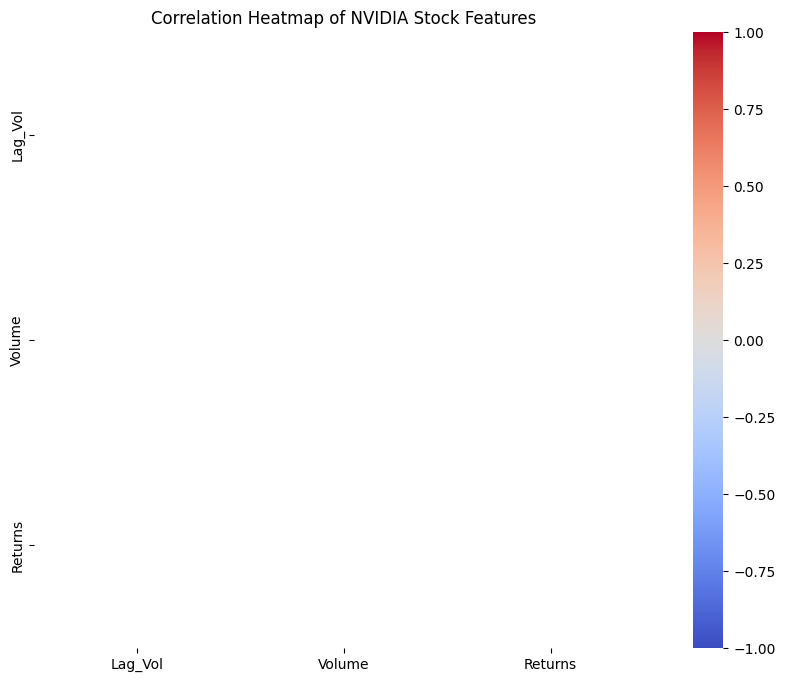

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of NVIDIA Stock Features')
plt.show()

All off-diagonal correlations are quite high (0.75 and above), which is a clear indication of multicollinearity among these variables.

The especially high correlation (0.90) between Volume and Returns is particularly concerning.

● Diagnosis:

Multicollinearity can be detected through:

a. Correlation matrix

A high correlation coefficient between two independent variables suggests multicollinearity.

b. Variance Inflation Factor (VIF)

A VIF significantly greater than 1 for a variable indicates multicollinearity.Generally, VIF values above 5-10 indicate problematic multicollinearity.

c. Eigenvalues of the correlation matrix

If one or more eigenvalues are close to zero, it suggests multicollinearity.

d.Heatmaps

Using a heatmap is one of the possible solutions to identify multicollinearity.

e. Scatter-plots

A scatter plot between any two fields in the dataset can show if the plots tend to converge in a single line or not.

● Damage:

Multicollinearity has potential to distort the outcomes of regression models and compromise the reliability of result.

It can lead to inflated standard errors, unstable coefficient estimates, and difficulty in determining the individual effects of correlated variables on volatility.


● Directions

Approaches to address multicollinearity include:

a. Principal Component Analysis (PCA)or Factor Analysis to create uncorrelated predictors.

Principal Component Analysis (PCA) and Factor Analysis are dimensionality reduction techniques that transform the original set of correlated predictors into a smaller set of uncorrelated variables known as principal components (in PCA)

b. Ridge regression or Lasso regularization

Ridge Regression and Lasso Regularization are techniques that add a penalty term to the regression model, helping to reduce the impact of multicollinearity by shrinking the coefficient estimates.

These methods are particularly useful when you suspect multicollinearity but do not want to discard any predictors.

c. Dropping highly correlated variables(if theoretically justified)

This approach is best used when you have a clear understanding of the relationships between variables and can justify the exclusion of certain predictors without losing significant explanatory power.

d. Factor analysis to create uncorrelated composite variables

e. Collect more data or combine correlated variables into a single index.

Increasing the sample size can sometimes reduce multicollinearity because it provides more information and variance




#3. **Sensitivity to Outliers**
## **Definition: Technical Definition Using Formulas**

**Volatility** is a statistical measure of the dispersion of returns for a given security or market index. It is often calculated as the standard deviation of returns over a specified period.

The basic formula for volatility is:


$$\sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (r_i - \mu)^2}$$


Where:

- \(n\) is the number of observations
- \(r_i\) is the return at time \(i\)
- \(\mu\) is the mean of the returns

**Outliers** are data points that are significantly different from the other observations. They can heavily influence the calculation of volatility, especially in financial time series where extreme events occur. That is to say, it occurs when a small number of extreme values disproportionately influence the results of a statiscal model. In financial modeling, outliers can distort predictions and lead to inaccurate conclusions.

## **Demonstration**

### Example using Python:

Here we demonstrate the effect of outliers on volatility calculation using a simulated dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulated daily returns data
np.random.seed(42)
returns = np.random.normal(0, 0.01, 100)  # Generate 100 normal returns
returns_with_outlier = np.append(returns, [0.5])  # Add an outlier

# Calculate volatility
volatility_normal = np.std(returns)
volatility_with_outlier = np.std(returns_with_outlier)

print(f"Volatility without outlier: {volatility_normal:.4f}")
print(f"Volatility with outlier: {volatility_with_outlier:.4f}")


Volatility without outlier: 0.0090
Volatility with outlier: 0.0504


## **Diagram**
### The following plot shows the distribution of returns with and without an outlier.

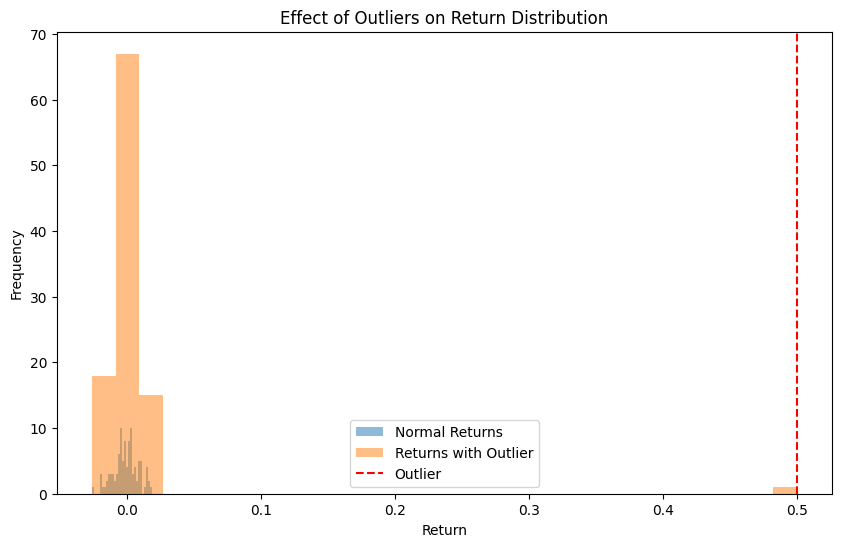

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=30, alpha=0.5, label='Normal Returns')
plt.hist(returns_with_outlier, bins=30, alpha=0.5, label='Returns with Outlier')
plt.axvline(x=0.5, color='r', linestyle='--', label='Outlier')
plt.legend()
plt.title('Effect of Outliers on Return Distribution')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()


# **Diagnosis**
To diagnose the presence of outliers, several methods can be used:
Boxplot: A graphical tool that shows the distribution of data and highlights potential outliers.
Z-score: Calculate the Z-score of each data point. A Z-score greater than 3 or less than -3 indicates a potential outlier.
Quantile-Quantile (Q-Q) Plot: Compare the distribution of the data to a normal distribution to visually inspect for outliers.

#### Example using Python:

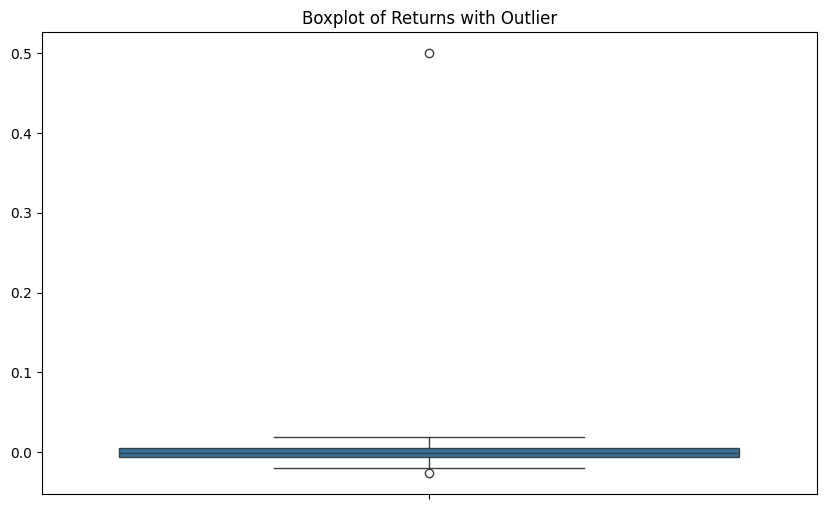

Potential outliers at indices: (array([100]),)


In [ ]:
from scipy.stats import zscore
import seaborn as sns

# Calculate Z-scores
z_scores = zscore(returns_with_outlier)

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(returns_with_outlier)
plt.title('Boxplot of Returns with Outlier')
plt.show()

# Identify potential outliers
outliers = np.where(np.abs(z_scores) > 3)
print("Potential outliers at indices:", outliers)


**Damage**

The presence of outliers can lead to:

Overestimation of Volatility: Resulting in excessive hedging costs and potentially uncompetitive pricing.

Skewed Risk Metrics: Making risk management decisions based on distorted metrics.

Misleading Signals: Traders might receive inaccurate signals for volatility spikes or crashes, leading to poor decision-making.

**Real-World Case Example:**

2010 Flash Crash: On May 6, 2010, the U.S. stock market experienced a sudden and extreme drop, with the Dow Jones Industrial Average plummeting nearly 1,000 points within minutes before quickly recovering. This event was an outlier in terms of price movement, and models that were sensitive to such outliers struggled to provide accurate predictions or assessments during the event. The flash crash highlighted the importance of robust models that can handle extreme market events without being unduly influenced by them.

# Directions: Suggested Models that Can Address This
To address sensitivity to outliers, consider the following approaches:

Robust Statistics:

Median Absolute Deviation (MAD): A robust measure of statistical dispersion that is less sensitive to outliers.
Robust Estimators: Use robust versions of the mean and standard deviation to calculate volatility.
Volatility Models:

GARCH with Robust Estimation: Incorporate robust estimators in Generalized Autoregressive Conditional Heteroskedasticity (GARCH) models.
Extreme Value Theory (EVT): Focuses on modeling and measuring the risk of extreme events (tail risk).
Filtering Outliers:

Winsorization: Replace extreme data points with less extreme values to reduce their influence.
Trimming: Remove the highest and lowest X% of data points before calculating volatility

## Example using Python:

In [ ]:
from statsmodels.robust.scale import mad

# Median Absolute Deviation (MAD)
mad_value = mad(returns_with_outlier)
print(f"MAD: {mad_value:.4f}")


MAD: 0.0073


## This handbook provides a comprehensive approach to addressing the problem of sensitivity to outliers in volatility modeling.

**References:**

   - Barnett, V., & Lewis, T. (1994). *Outliers in Statistical Data.* John Wiley & Sons.
     - This article discusses the identification and treatment of outliers in various types of data, with a focus on the impact of outliers on statistical models.

   - Huber, P. J. (1964). *Robust Estimation of a Location Parameter.* The Annals of Mathematical Statistics, 35(1), 73–101.
     - This seminal paper introduces Huber Regression, a robust method for handling outliers in regression analysis.

   - James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An Introduction to Statistical Learning: With Applications in R.* Springer.
     - This book provides a comprehensive introduction to statistical learning, including robust regression techniques to address sensitivity to outliers.
   - Rousseeuw, P. J., & Leroy, A. M. (2003). *Robust Regression and Outlier Detection.* John Wiley & Sons.
     - This book focuses specifically on robust regression techniques and methods for detecting and handling outliers.

   - *Sensitivity to Outliers in Linear Regression.* (n.d.). Retrieved from https://towardsdatascience.com/sensitivity-to-outliers-in-linear-regression-b4b123ce4c31
     - This article provides a detailed discussion on the sensitivity of linear regression models to outliers, with examples and visualizations.
   - *Robust Regression in Python.* (n.d.). Retrieved from https://scikit-learn.org/stable/auto_examples/linear_model/plot_huber_vs_ridge.html
     - This online resource from Scikit-learn provides examples of implementing robust regression techniques, including Huber Regression, in Python.

   - Kirilenko, A. A., Kyle, A. S., Samadi, M., & Tuzun, T. (2017). *The Flash Crash: High-Frequency Trading in an Electronic Market.* The Journal of Finance, 72(3), 967–998.
     - This paper provides an analysis of the 2010 Flash Crash, including how outliers and extreme events affected market dynamics and the performance of trading algorithms.

M. Hammad Hassan, 3 Ways To Detect Multicollinearity & Reasons Why To Expect It, https://medium.com/@hammad.ai/3-ways-to-detect-multicollinearity-in-your-dataset-6ee1776b7aa8,Sep 2, 2023

 Bex Tuychiyev, Understanding Skewness And Kurtosis And How to Plot Them,
    https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis

Nvidia statistics, google finance.

Azzalini, Adelchi, and Antonella capitanio. The Skew-normal and Related Families. Cambridge University Press, IMS Monographs Series, 2014